# Visualizing 1D data

In [1]:
import matplotlib
%matplotlib inline

In [2]:
matplotlib.__version__

'1.5.dev1'

In [3]:
import pandas as pd

In [4]:
pd.__version__

'0.16.2'

Let's start with 1D data, e.g., a time series. The time-series plot is the most common form of graph. `pandas` provides a great toolkit for working with time series data (finance, atmospheric and oceanic sciences...).

References:
- [Tufte](http://www.edwardtufte.com/tufte/books_vdqi), Edward R. (2001), *The Visual Display of Quantitative Information* (2nd ed.), Cheshire, CT: Graphics Press
- Time series and date functionality in [pandas](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [5]:
ts = pd.Series.from_csv('data/coherence_timeseries.csv')

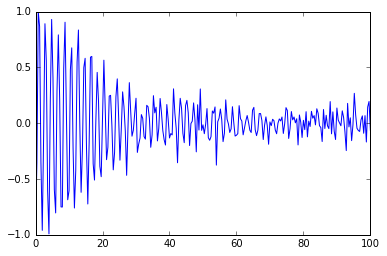

In [6]:
ts.plot()

In [7]:
matplotlib.style.use('ggplot')

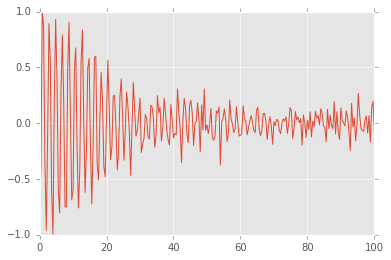

In [8]:
ts.plot()

Introduce *data-ink*. Touch on the principle of maximizing the data-ink ratio.

### Challenges (High-Resolution Data Graphics)

How many time scales can you see (guess)?

What does `ts.plot(xlim=[0, 20])` visualize?

`ts` is a time series, so it's indexed with... time.

In [9]:
ts.index[100]

40.0

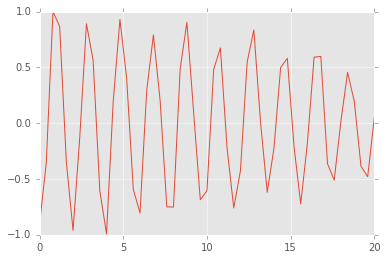

In [10]:
ts.loc[:20].plot()

Can you (comfortably) visualize both time scales on the same one plot?

In [11]:
import matplotlib.pyplot as plt

Let's take a closer look at cyclical data and strong variations.

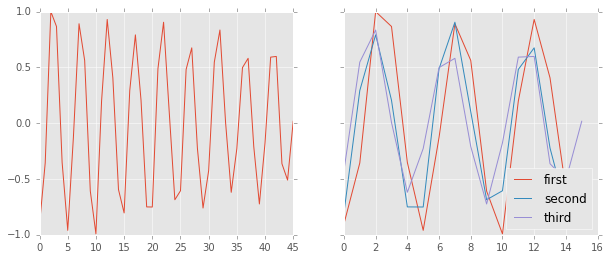

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(ts.loc[:18])
ax2.plot(ts.loc[:6])
ax2.plot(ts.loc[6:12])
ax2.plot(ts.loc[12:18])
ax2.legend(['first', 'second', 'third'], loc=4)
f.set_size_inches(10, 4)

Which of the above do you prefer?

In [13]:
ts_reverse = ts.sort_index(ascending=False).reset_index()

In [14]:
ts_reverse.columns

Index(['index', 0], dtype='object')

In [15]:
del ts_reverse['index']

In [16]:
ts_reverse.columns = ['signal']

In [17]:
ts_reverse.head()

,signal
0,-0.063590
1,0.194785
2,0.145389
3,-0.168586
4,0.067726


In [18]:
import numpy as np

In [19]:
ts_reverse['variations'] = 5 + ts_reverse['signal'] * 6 + 0.001 * np.arange(len(ts)) ** 2

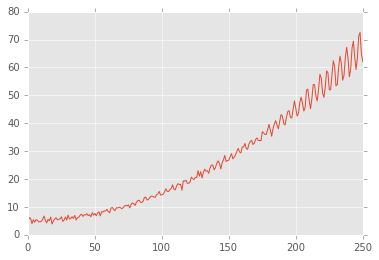

In [20]:
ts_reverse['variations'].plot()

Let's say we are done with exploration, we are now communicating results.
What does the above visualize poorly?
What does it visualize well?
How about the following:

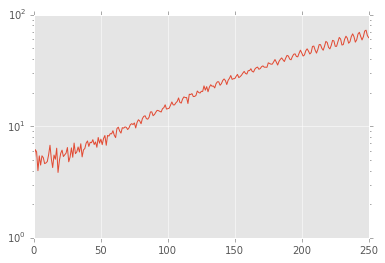

In [21]:
ts_reverse['variations'].plot(logy=True)

?

In [22]:
ts_reverse['offset'] = ts_reverse['signal'] + 10

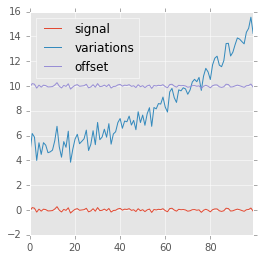

In [23]:
ts_reverse[:100].plot(figsize=(4, 4))

Touch on the Shrink Principle and multivariate analysis.